In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("darkgrid", {"axes.edgecolor": 'black'})

NPROC = [1, 2, 4, 8, 16, 32, 48]

In [2]:
df = pd.read_csv("../data/test.csv")
cas = df[df['dest']=='cascadia']

In [4]:
rst1 = []
for i in NPROC:
    d = cas[(cas['nproc'] == i) & (cas['method'] == 'zarr+minio')]['time']
    rst1.append([np.mean(d), np.std(d)])
rst1 = np.array(rst1)

rst2 = []
for i in NPROC:
    d = cas[(cas['nproc'] == i) & (cas['method'] == 'h5+local')]['time']
    rst2.append([np.mean(d), np.std(d)])
rst2 = np.array(rst2)
scp = np.zeros(7)
scp[:3] = 44/np.array([1, 2, 4])
scp[3:] = 44/4

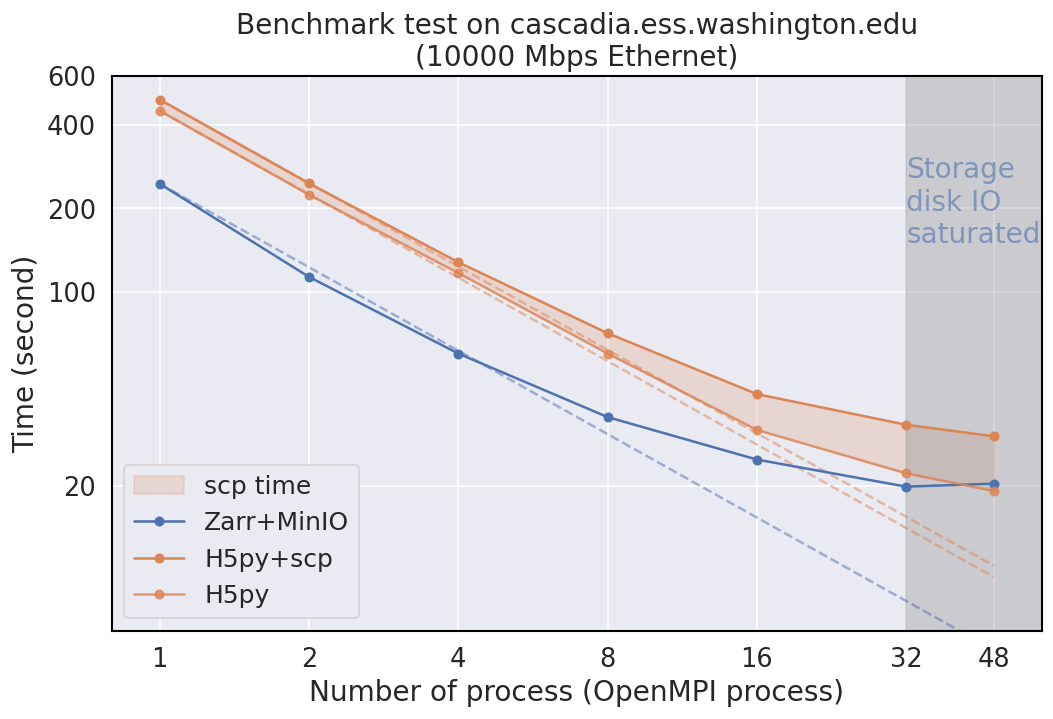

In [50]:
plt.figure(figsize = (10, 6), dpi = 120)


plt.errorbar(NPROC, rst1[:, 0], marker='.', markersize = 10, label = 'Zarr+MinIO')
plt.errorbar(NPROC, rst2[:, 0] + scp, marker='.', markersize = 10, color = "#DD8453", label = 'H5py+scp')
plt.errorbar(NPROC, rst2[:, 0], marker='.', markersize = 10, label = 'H5py', alpha = 0.8)
plt.fill_between(NPROC, rst2[:, 0] + scp, rst2[:, 0] , color = "#DD8453", label = 'scp time', alpha = 0.2)
plt.fill_between([32, 80], 1000, 0, color = 'gray', alpha = 0.3)
plt.text(32, 150, "Storage\ndisk IO\nsaturated", color = '#4C72B0', alpha = 0.6)

plt.plot(NPROC, rst1[0, 0]/np.array(NPROC), linestyle = '--', color = "#4C72B0", alpha = 0.5)
plt.plot(NPROC, rst2[0, 0]/np.array(NPROC), linestyle = '--', color = "#DD8453", alpha = 0.5)
plt.plot(NPROC, (rst2[0, 0] + scp[0])/np.array(NPROC), linestyle = '--', color = "#DD8453", alpha = 0.5)

plt.xlim([0.8, 60])
plt.ylim([6, 550])


plt.xscale("log")
plt.yscale("log")
plt.xticks(NPROC, NPROC)
plt.yticks([20, 100, 200, 400, 600], [20, 100, 200, 400, 600])

# axins = plt.gca().inset_axes([0.57, 0.57, 0.27, 0.2])
# # axins.imshow(Z2, extent=extent, origin="lower")
# # sub region of the original image
# axins.errorbar(NPROC, rst1[:, 0], marker='.', markersize = 10, label = 'Zarr+MinIO')
# axins.errorbar(NPROC, rst2[:, 0] + scp, marker='.', markersize = 10, color = "#DD8453", label = 'H5py+scp')
# axins.errorbar(NPROC, rst2[:, 0], marker='.', markersize = 10, label = 'H5py', alpha = 0.8)
# axins.fill_between(NPROC, rst2[:, 0] + scp, rst2[:, 0] , color = "#DD8453", label = 'scp time', alpha = 0.2)
# axins.set_xticks([32, 48])
# axins.set_xticklabels([32, 48], fontsize = 10)
# axins.set_yticks([20, 40])
# axins.set_yticklabels([20, 40], fontsize = 10)
# axins.set_xlim(20, 55)
# axins.set_ylim(15, 25)
# # axins.set_yticklabels([])
# plt.gca().indicate_inset_zoom(axins, edgecolor="black")


plt.xlabel("Number of process (OpenMPI process)")
plt.ylabel("Time (second)")
plt.legend(fontsize = 15, loc = 'lower left')
plt.title("Benchmark test on cascadia.ess.washington.edu\n(10000 Mbps Ethernet)")
plt.savefig('../data/bm-cascadia.png', dpi = 300, bbox_inches = 'tight')

In [5]:
df2 = pd.read_csv("../data/chunk_size_test.csv", delimiter= ',')[:-1]
df3 = pd.read_csv("../data/local_zarr_test.csv", delimiter= ',')

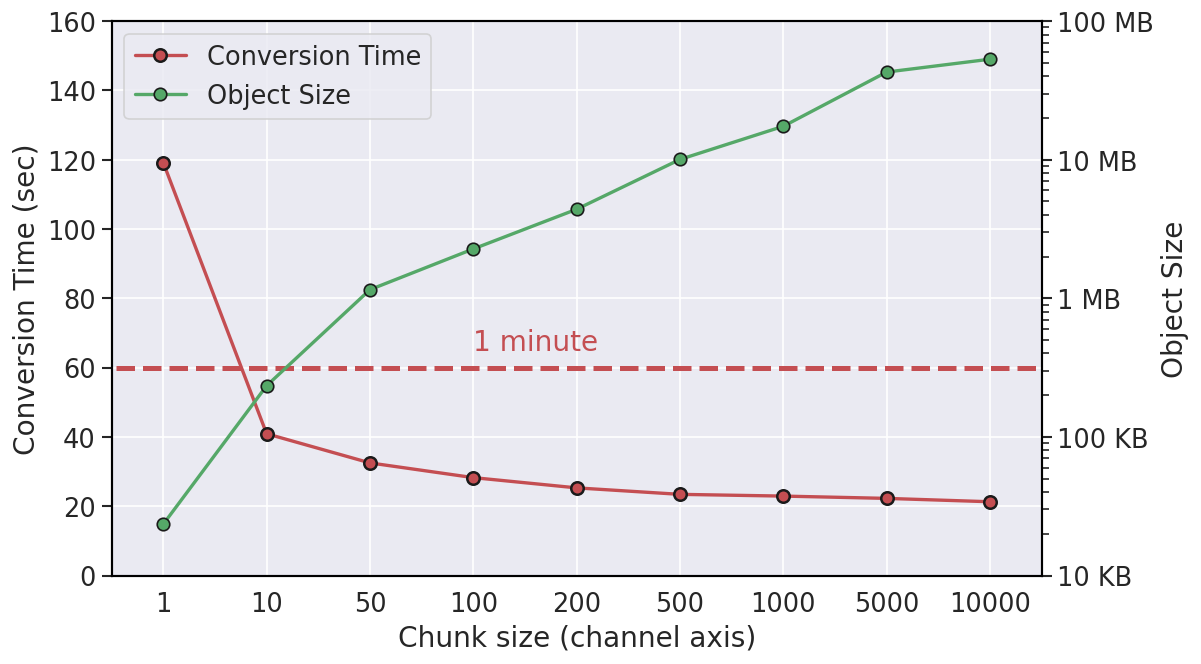

In [6]:
plt.figure(figsize = (10, 6), dpi = 120)
plt.plot(np.arange(9), df2['conversion_time_per_h5'], marker = '.', markersize = 15, linewidth = 2,
                    color = 'r', label = "Conversion Time", markeredgewidth=1.5, markeredgecolor = 'k')
plt.hlines(60, -2, 12, color = 'r', linestyles= '--', linewidth = 3)
plt.text(3, 65, "1 minute", color = 'r')
plt.ylabel("Conversion Time (sec)")
# plt.yscale("log")
plt.ylim([0, 160])
lines, labels = plt.gca().get_legend_handles_labels()
plt.xlabel("Chunk size (channel axis)")

ax2 = plt.gca().twinx()
plt.xlim([-0.5, 8.5])
plt.ylim([0.01, 100])


ax2.plot(np.arange(9), 1115/df2['number_of_objects_per_h5'], marker = '.', markersize = 15, linewidth = 2,
                    color = 'g', markeredgewidth=1., markeredgecolor = 'k', label = "Object Size")
plt.ylabel("Object Size")
plt.yscale("log")
plt.yticks([0.01, 0.1, 1, 10, 100], ["10 KB", "100 KB", "1 MB", "10 MB", "100 MB"])


plt.xticks(np.arange(9), [int(i) for i in df2['chunksize_dim1']])

lines2, labels2 = ax2.get_legend_handles_labels()
plt.gca().legend(lines + lines2, labels + labels2, loc = 'upper left')
plt.grid(False)

plt.savefig('../data/bm-conversion-processing.png', dpi = 300, bbox_inches = 'tight')

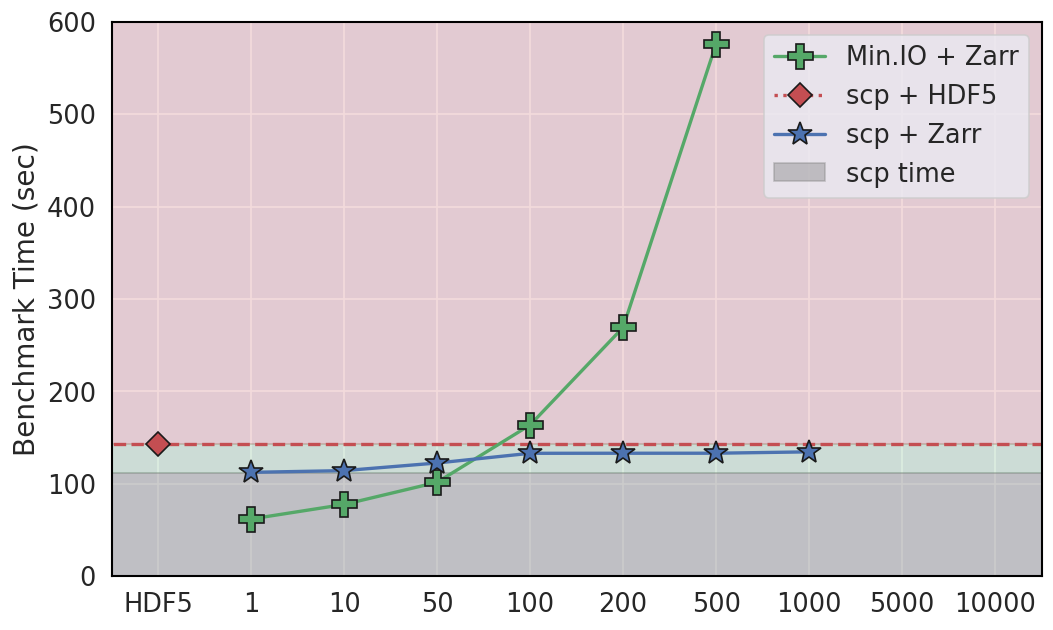

In [11]:
plt.figure(figsize = (10, 6), dpi = 120)
# plt.bar(np.arange(1, 10), df2['number_of_objects_per_h5'], edgecolor = 'k', width = 0.5, #marker = '.', markersize = 15, linewidth = 2,
                    # label = "Conversion",)# markeredgewidth=1.5, markeredgecolor = 'k')
# plt.bar([0], [1], edgecolor = 'k', color = '#4C72B0', width = 0.5, #marker = '.', markersize = 15, linewidth = 2,
                    # label = "Conversion",)# markeredgewidth=1.5, markeredgecolor = 'k')
# plt.ylabel("Number of obejcts per file")
# plt.yscale("log")
# lines, labels = plt.gca().get_legend_handles_labels()
# plt.xlabel("Chunk size (channel axis)")
# ax2 = plt.gca().twinx()
# plt.ylim([0, 1100])
# ax2.plot(np.arange(9), 1115/df2['number_of_objects_per_h5'], marker = '.', markersize = 15, linewidth = 2,
#                     color = 'g', markeredgewidth=1., markeredgecolor = 'k')
# plt.ylabel("Object Size")
# plt.yscale("log")
# plt.yticks([0.01, 0.1, 1, 10, 100], ["10 KB", "100 KB", "1 MB", "10 MB", "100 MB"])

scp_time = 111.211
hdf5_time = 31.295

plt.plot(np.arange(1,7), df2['computing_time'][:-3], marker = 'P', markersize = 15, linewidth = 2,
                    color = 'g', label = "Min.IO + Zarr", markeredgewidth=1., markeredgecolor = 'k')
# plt.plot(np.arange(1,10)[-4:-2], df2['computing_time'][-4:-2], marker = "P", linestyle = ':', markersize = 15, linewidth = 2, color = 'g',
                #  markeredgewidth=1., markeredgecolor = 'k')
plt.plot([0], scp_time + hdf5_time, marker = "D", linestyle = ':', markersize = 10, linewidth = 2, color = 'r',
                 markeredgewidth=1., markeredgecolor = 'k', label = "scp + HDF5")
plt.plot(np.arange(1,8), scp_time + df3['computing_time'][:7], marker = "*", markersize = 15, linewidth = 2, color = 'b',
                 markeredgewidth=1., markeredgecolor = 'k', label = "scp + Zarr")

plt.fill_between([-1, 10], scp_time + hdf5_time, scp_time, alpha = 0.2, color = "g")
plt.fill_between([-1, 10], 700, scp_time + hdf5_time, alpha = 0.2, color = "r")
plt.fill_between([-1, 10], scp_time, alpha = 0.4, color = "gray", label = "scp time")

plt.hlines(scp_time + hdf5_time, -2, 12, linestyle = '--', linewidth = 2, color = 'r')
plt.ylabel("Benchmark Time (sec)")
plt.xticks(np.arange(10), ["HDF5"]+[int(i) for i in df2['chunksize_dim1']])
plt.xlim([-0.5, 9.5])
plt.ylim([0, 600])

plt.legend()
plt.grid(True)
plt.savefig('../data/bm-local-zarr.png', dpi = 300, bbox_inches = 'tight')